# Simple neural network

In this notebook, we are going to create and train a simple neural network on the digits dataset using JAX.

In [38]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

First, we need to load the data and make them into Jax arrays.

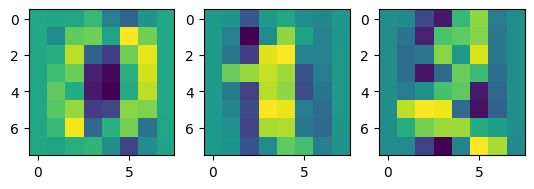

In [ ]:
X, y = load_digits(return_X_y=True)

# Normalize

X -= X.mean(axis=0)
X /= np.std(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

f, axes = plt.subplots(1, 3)
for i, axe in enumerate(axes):
    axe.imshow(X[i].reshape(8, 8))

x = jnp.array(X_train)
y = jnp.array(y_train)
n, p = x.shape  # n = 1347, p = 64
x_test = jnp.array(X_test)
y_test = jnp.array(y_test)

# Define the network

We will work with a simple network with two layers (one hidden layer).

The input $x$ is transformed into the output $z$ by the following operations:

$$y = \tanh(W_1x + b_1)$$
$$z = W_2y + b_2\in \mathbb{R^{\sharp\text{classes}}}.$$

The predicted class is then the argmax of the output.

**Exercise 1**: Define a function `net(x, W1, b1, W2, b2)` that implements this transform (without taking the argmax). Remember that `x` is a matrix of size $n\times p$

In [40]:
def net(x, W1, b1, W2, b2):
    # your code here
    return z

Next, let us specify the parameters of the network, `W1, b1, W2, b2`. You can chose the size of the hidden layer, but the input and output sizes are determined by the problem.

**Exercise 2**: Define a set of parameters `W1, b1, W2, b2`, where you chose the size of the hidden layer. To instantiate random matrices in Jax, we use `PRNGKeys`: check out the syntax of the function `jax.random.normal`.

In order to check that everything works, compute `net(x, W1, b1, W2, b2)`.

In [41]:
hidden_size = #
input_size = #
output_size = #

key, subkey = jax.random.split(jax.random.PRNGKey(0))
W1 = # your code here
b1 = # your code here
key, subkey = jax.random.split(key)
W2 = # your code here
b2 = # your code here

parameters = (W1, b1, W2, b2)

output = net(x, W1, b1, W2, b2)

Next, we will define a cost function. We will use the classical cross entropy loss. 

In [42]:
def cross_entropy_loss(logits, labels):  # logits is the output of the network
    one_hot_labels = jax.nn.one_hot(labels, num_classes=10)  # transforms i to [0, 0, ..., 1, ..., 0] with 1 in position i
    return -jnp.mean(jnp.sum(one_hot_labels * logits, axis=-1))

**Exercise 3**: Compute the current loss of the network, and then back-propagate to compute the gradient with respect to the parameters.

In [43]:
def loss(x, W1, b1, W2, b2, y):
    # your code here
    return #

## your code here

We are almost ready to train our network!

But first, we will need to compute the accuracy of the network, on the train and test set.

**Exercise 4**: Define a function `accuracy(X, y, W1, b1, W2, b2)` that computes the accuracy of the network on the dataset `x`with true labels `y`, i.e., the proportion of correct predictions. Remember that the predicted class at the output of the network is computed as the argmaximum of the output. Compute the current accuracy of the network on the train set. Is it normal ?

In [44]:
def accuracy(X, y, W1, b1, W2, b2):
    # your code here
    return #

train_accuracy = accuracy(x, y, W1, b1, W2, b2)
print(f"Train accuracy: {train_accuracy}")

Train accuracy: 0.10170750319957733


# Training the network

We are now ready to train the network, using back-propagation and stochastic gradient descent.
First, we define the number of iterations of the algorithm, the step size, and the batch size. We also reinitialize the weights. Finally, we will store the train and test accuracy during the training.

In [46]:
n_iter = 1000
step_size = 0.1
batch_size = 64


test_list = []
train_list = []

**Exercise 5**: Complete the following training list, so that each parameter is updated at each iteration.

In [24]:
for i in range(n_iter):
    batch_idx = np.random.permutation(n)[:batch_size]
    x_batch = x[batch_idx]
    y_batch = y[batch_idx]
    
    ## Compute gradients
    # your code here
    
    ## Update parameters
    W1 -= # your code here
    b1 -= # your code here
    W2 -= # your code here
    b2 -= # your code here
    
    if i % 10 == 0:
        train_acc = accuracy(x, y, W1, b1, W2, b2)
        test_acc = accuracy(x_test, y_test, W1, b1, W2, b2)
        test_list.append(test_acc)
        train_list.append(train_acc)
        print(f'Iteration {i} Train acc: {train_acc:.3f} Test acc: {test_acc:.3f}')


Iteration 0 Train acc: 0.106 Test acc: 0.098
Iteration 10 Train acc: 0.156 Test acc: 0.151
Iteration 20 Train acc: 0.229 Test acc: 0.229
Iteration 30 Train acc: 0.312 Test acc: 0.322
Iteration 40 Train acc: 0.393 Test acc: 0.411
Iteration 50 Train acc: 0.461 Test acc: 0.487
Iteration 60 Train acc: 0.509 Test acc: 0.522
Iteration 70 Train acc: 0.552 Test acc: 0.564
Iteration 80 Train acc: 0.583 Test acc: 0.582
Iteration 90 Train acc: 0.609 Test acc: 0.607
Iteration 100 Train acc: 0.633 Test acc: 0.629
Iteration 110 Train acc: 0.658 Test acc: 0.651
Iteration 120 Train acc: 0.674 Test acc: 0.664
Iteration 130 Train acc: 0.703 Test acc: 0.678
Iteration 140 Train acc: 0.712 Test acc: 0.687
Iteration 150 Train acc: 0.729 Test acc: 0.709
Iteration 160 Train acc: 0.741 Test acc: 0.713
Iteration 170 Train acc: 0.754 Test acc: 0.724
Iteration 180 Train acc: 0.754 Test acc: 0.724
Iteration 190 Train acc: 0.768 Test acc: 0.740
Iteration 200 Train acc: 0.777 Test acc: 0.749
Iteration 210 Train acc:

We display the learning curves. You can then play with the network and training parameters:
what happens when you change the learning rate, the number of hidden sizes, etc?

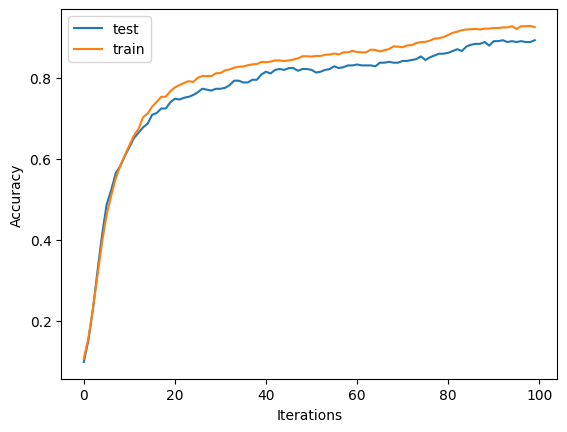

In [25]:
plt.plot(test_list, label='test')
plt.plot(train_list, label='train')

plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.show()